In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import logit

**Task 1**

In [2]:
aineisto = pd.read_csv("C:/Users/testi/Desktop/excel_files/HealthData.csv", index_col=0)

In [3]:
aineisto["HBad"] = np.where(aineisto["Hstatus"] == 3, 1, 0)

In [4]:
health = aineisto[["HBad", "Age", "Sex", "Mstatus"]].copy()

In [5]:
health.dtypes

HBad       int32
Age        int64
Sex        int64
Mstatus    int64
dtype: object

In [6]:
l = ["Sex", "Mstatus"]

In [7]:
for i in l:
    health[i] = health[i].astype("category")

In [8]:
health.dtypes

HBad          int32
Age           int64
Sex        category
Mstatus    category
dtype: object

In [9]:
d = {1: "Male", 2: "Female"}

In [10]:
health["Sex"] = health["Sex"].map(d)

In [11]:
d2 = {1: "Relationship", 2: "Single", 3: "Seperated", 4: "Widowed"}

In [12]:
health["Mstatus"] = health["Mstatus"].map(d2)

In [13]:
health.head()

,HBad,Age,Sex,Mstatus
1,0,60,Male,Relationship
2,0,36,Female,Relationship
3,0,37,Female,Relationship
4,0,41,Female,Relationship
5,0,42,Male,Single


**Task 2**

In [14]:
model1 = logit("HBad ~ Age + Sex + Mstatus", data=health).fit()

Optimization terminated successfully.
         Current function value: 0.265326
         Iterations 8


$ logit(\pi_{HBad}) = \beta_0 + \beta_1 * Sex[Female] + \beta_2 * Mstatus[Single] + \beta_3 * Mstatus[Seperated] + \beta_4 * Mstatus[Widowed] + \beta_5 * Age $

In [15]:
model1.params

Intercept              -6.940682
Sex[T.Female]          -0.611334
Mstatus[T.Single]       0.685021
Mstatus[T.Seperated]    0.437117
Mstatus[T.Widowed]     -0.488341
Age                     0.099724
dtype: float64

**Task 3**

The intercept term can be interpreted with odds, and the rest of the coefficients can be interpreted with a ratio of odds.

**Odds** = $\Large\frac{\theta}{1 - \theta}$

**Ratio of Odds** = $\Large\frac{Odds_1}{Odds_2}$

For the intercept term $ \beta_0 $ we'll get an interpretation by setting the variables Sex, Mstatus, and Age to zero.

In [16]:
b = model1.params

In [29]:
np.exp(b[0])

0.0009676091714895831

- So this tells us that, for a Male, who's marital status is "Relationship" and Age is zero, the odds for bad health is 0.00097.

- The explanation for the interpretation of $ \beta_0 $ comes from the fact that when we want to interpret only a specific $ \beta $ value, we have to "fix" the other variables by setting them to zero. Zero in terms of categorical variables means that we are at the reference category, which is "Male" for Sex variable, and "Relationship" for Mstatus variable. Age being continuous variable is trivial; when Age is zero, a person is zero years old.

- Here of course the intercept value $ \beta_0 $ does not have a meaningful interpretation. It is not possible to have a person who is zero years old and has a marital status of "Relationship".
- This problem could be tackled with centering the Age variable, which would then yield a meaningful interpretation for the intercept term.

In [30]:
np.exp(b[1])

0.5426267558228862

- The odds of having bad health for women is 0.543-fold compared to men, when marital status and age are adjusted.
- By adjusting the variables we are essentially just controlling them. So here the adjusting of the predictor variables Mstatus and Age means that the comparison above is eligible for women and men with the same marital status and age.

In [35]:
print(np.exp(b[2]))
print(np.exp(b[3]))
print(np.exp(b[4]))

1.9838136247234983
1.5482373740769326
0.6136434042568708


- All of the coefficients related to marital status ($\beta_2, \beta_3, \beta_4$) are presented above.

The interpretation for all of them is the same:
- When comparing to the reference category (Mstatus[Relationship]), and the predictors Sex and Age are adjusted, then the odds for bad health is the corresponding ratio in favor of the reference group.

In [55]:
np.exp(b[5])

1.1048662750024658

- When comparing people of the same sex and marital status, who's age differ by one year, then the person who's one year older has a 1.105-fold odds of having bad health status compared to the younger person.

**Task 4**

Let's present all of the ratios of odds and the corresponding confidence intervals in a Pandas DataFrame.

In [59]:
e_ci = np.exp(pd.DataFrame({"OR": model1.params,
                            "Lower CI": model1.conf_int(alpha=0.05)[0],
                            "Upper CI": model1.conf_int(alpha=0.05)[1]}))

In [60]:
e_ci

,OR,Lower CI,Upper CI
Intercept,0.000968,0.000130,0.007208
Sex[T.Female],0.542627,0.271717,1.083641
Mstatus[T.Single],1.983814,0.724103,5.435020
Mstatus[T.Seperated],1.548237,0.410293,5.842257
Mstatus[T.Widowed],0.613643,0.165042,2.281586
Age,1.104866,1.063989,1.147314


**Task 5**

Lets add an interaction for Sex and Mstatus to the model.

In [66]:
model2 = logit("HBad ~ Age + Sex + Mstatus + Sex:Mstatus", data=health).fit()

Optimization terminated successfully.
         Current function value: 0.264750
         Iterations 8


In [63]:
model2.params

Intercept                            -7.025919
Sex[T.Female]                        -0.480747
Mstatus[T.Single]                     0.989813
Mstatus[T.Seperated]                  0.506012
Mstatus[T.Widowed]                   -0.436354
Sex[T.Female]:Mstatus[T.Single]      -0.738791
Sex[T.Female]:Mstatus[T.Seperated]   -0.190660
Sex[T.Female]:Mstatus[T.Widowed]     -0.145242
Age                                   0.100464
dtype: float64

**Task 6**

In [71]:
beta = model2.params

Odds ratios (OR) related to covariate Mstatus for a male can be achieved by setting Sex[Female] to zero, and adjusting for the Age variable.

In [75]:
np.exp(beta[2])

2.690731745663582

- When comparing men in relationship and single, the odds for bad health are 2.69-fold for men in relationship.

In [76]:
np.exp(beta[3])

1.6586639193585422

- When comparing men in relationship and seperated, the odds for bad health is 1.66-fold for men in relationship

In [77]:
np.exp(beta[4])

0.6463890371048546

- When comparing men in relationship and widowed, the odds for bad health is 0.65-fold for men in relationship.

**Task 7**

- Now, when interpreting the odds ratios (OR) related to covariate Mstatus for a female, we'll have to take the interaction term into account.

In [78]:
model2.params

Intercept                            -7.025919
Sex[T.Female]                        -0.480747
Mstatus[T.Single]                     0.989813
Mstatus[T.Seperated]                  0.506012
Mstatus[T.Widowed]                   -0.436354
Sex[T.Female]:Mstatus[T.Single]      -0.738791
Sex[T.Female]:Mstatus[T.Seperated]   -0.190660
Sex[T.Female]:Mstatus[T.Widowed]     -0.145242
Age                                   0.100464
dtype: float64

In [80]:
np.exp(beta[2] + beta[5])

1.2853380250316329

- When comparing women in relationship and single, the odds for bad health is 1.29-fold for women in relationship.

In [81]:
np.exp(beta[3] + beta[6])

1.3707416111231967

- When comparing women in relationship and seperated, the odds for bad health is 1.371-fold for women in relationship.

In [82]:
np.exp(beta[4] + beta[7])

0.559005547417022

- When comparing women in relationship and widowed, the odds for bad health is 0.56-fold for women in relationship.

Note that all of the results above (in task 7) assumes that the variable Age is held constant, meaning that we are comparing people with the same age.

**Task 8**

Next we'll calculate the 95 % confidence intervals for the ratios of odds calculated in task 6.

In [91]:
e_ci2 = np.exp(pd.DataFrame({"OR": model2.params[2:5],
                             "Lower CI": model2.conf_int(alpha=0.05)[0][2:5],
                             "Upper CI": model2.conf_int(alpha=0.05)[1][2:5]}))

In [92]:
e_ci2

,OR,Lower CI,Upper CI
Mstatus[T.Single],2.690732,0.762216,9.498673
Mstatus[T.Seperated],1.658664,0.317041,8.677622
Mstatus[T.Widowed],0.646389,0.066635,6.270278


- Since all of the confidence intervals include 1, we can conclude that none of the results are statistically significant

**Task 10**

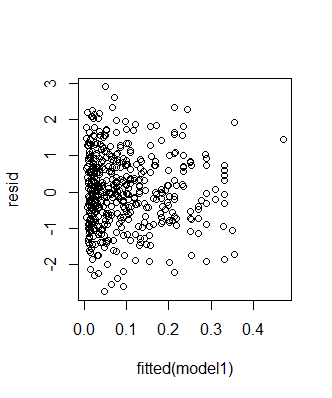

In [2]:
from PIL import Image
img = Image.open("qresiduals.png")
img

The randomized quantile residuals for the interaction model does look normally distributed.

**Task 11**

Well probably the easiest way to choose if a covariate should be taken into the model as a predictor is to simply seperate the data available into training and test set. Then we train the model with and without the covariate. Whichever model does a better job predicting the test data should be used. This can then be repeated for n covariates. Over-fitting should be taken into account here.